In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X=df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked','Survived'])

In [6]:
y=df.Survived

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [8]:
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [9]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\navee\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

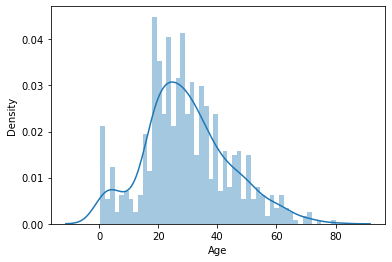

In [10]:
sns.distplot(X.Age,bins=50)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

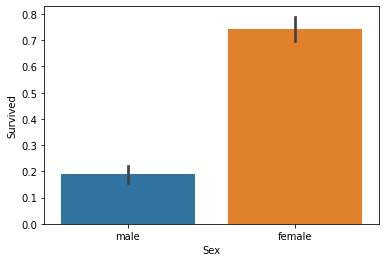

In [11]:
sns.barplot(data=df,x='Sex',y='Survived')

In [12]:
mean = X["Age"].mean()
std = X["Age"].std()
is_null = X["Age"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
rand_age

age_slice = X["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
X["Age"] = age_slice
X["Age"] = X["Age"].astype(int)

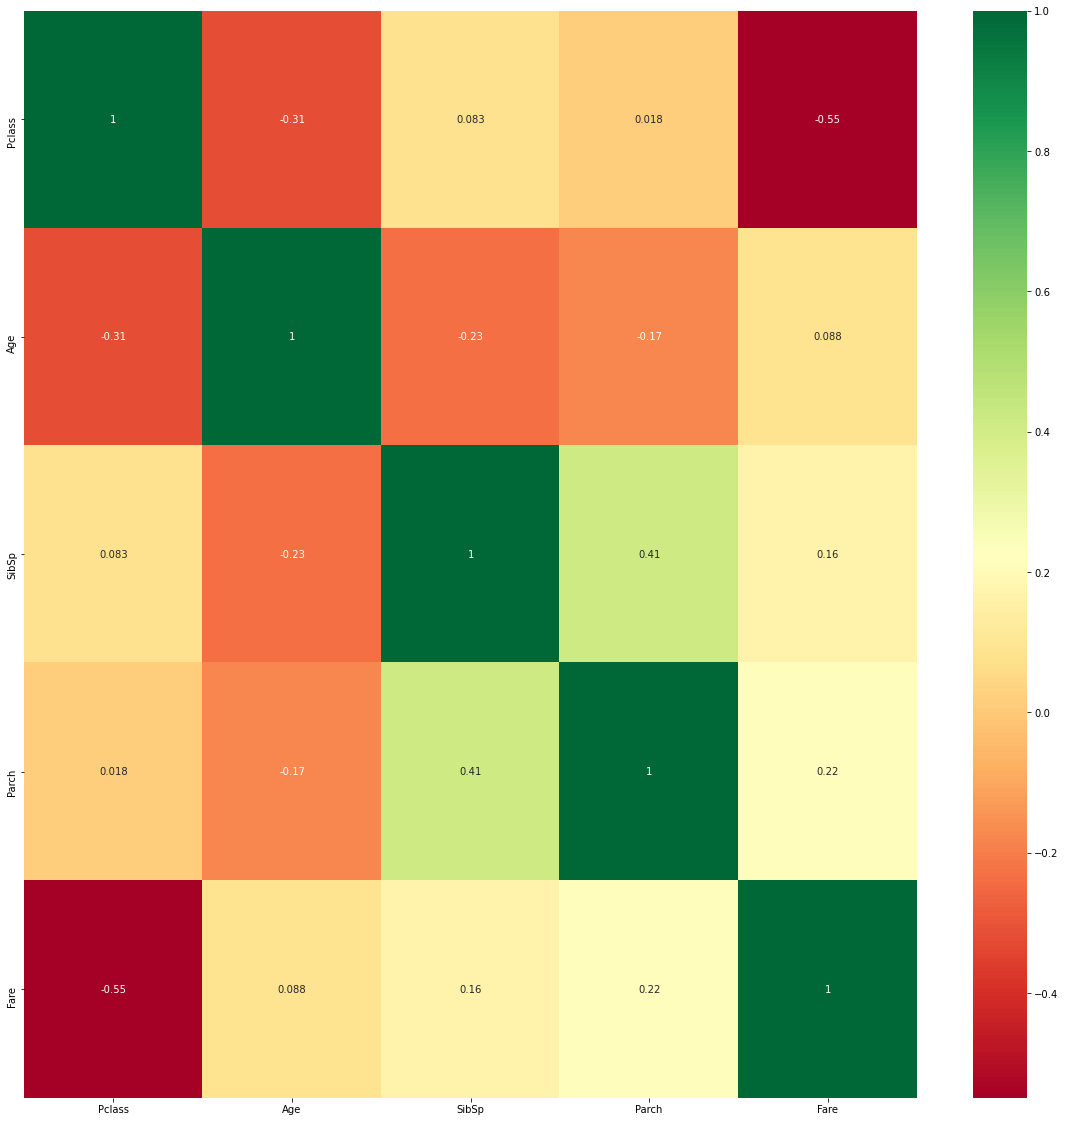

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
X['relatives']=X['SibSp']+X['Parch']

In [16]:
X.drop(columns=['SibSp','Parch'],inplace=True)

In [17]:
X.head()

,Pclass,Sex,Age,Fare,relatives
0,3,male,22,7.2500,1
1,1,female,38,71.2833,1
2,3,female,26,7.9250,0
3,1,female,35,53.1000,1
4,3,male,35,8.0500,0


In [33]:
nominal_features=['Sex','Pclass','relatives']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [35]:
nominal_transformer=Pipeline(steps=[('nominal',OneHotEncoder())])

In [36]:
preprocessor1=ColumnTransformer(transformers=[
      ('T3',nominal_transformer,nominal_features)
      ],sparse_threshold=0)

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
dt=DecisionTreeClassifier()
grid= {"max_depth": range(1,5),
       "max_features": range(1, 6),
       "min_samples_leaf": range(1, 9),
       "criterion": ["gini", "entropy"]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=dt, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [48]:
model=Pipeline(steps=[('preprocessor1',preprocessor1),
                ('model',grid_search)
                ])

In [49]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('T3',
                                                  Pipeline(steps=[('nominal',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Pclass',
                                                   'relatives'])])),
                ('model',
                 GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                              error_score=0, estimator=DecisionTreeClassifier(),
                              n_jobs=-1,
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': range(1, 5),
                                          'max_features': range(1, 6),
                                          'min_samples_leaf': range(1, 9)},
              

In [50]:
y_pred=model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[98,  7],
       [29, 45]], dtype=int64)

In [54]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 8}

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7988826815642458

In [59]:
import pickle 
pickle.dump(model,open('Decision_model.pkl','wb'))